<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель**

Получение значения метрики F1-мера не менее 0,59 на тестовых данных.

**Структура исследования**
1. Подготовка данных
2. Исследование задачи
3. Борьба с дисбалансом
4. Тестирование модели

**Использование дополнительных модулей**
- `pandas` – редактор баз данных  
- `sklearn` – машинное обучение
- `matplotlib` – построение графиков

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Инструкция для подавления предупреждения FutureWarning, которое возникает при запуске цикла (см. ниже)
# for model in [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]:

pd.options.mode.chained_assignment = None
# Инструкция для подавления предупреждения SettingWithCopyWarning, которое возникает при выполнении масштабирования

## Подготовка данных

In [2]:
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Признаки**  
`RowNumber` — индекс строки в данных  
`CustomerId` — уникальный идентификатор клиента  
`Surname` — фамилия  
`CreditScore` — кредитный рейтинг  
`Geography` — страна проживания  
`Gender` — пол  
`Age` — возраст  
`Tenure` — сколько лет человек является клиентом банка  
`Balance` — баланс на счёте  
`NumOfProducts` — количество продуктов банка, используемых клиентом  
`HasCrCard` — наличие кредитной карты  
`IsActiveMember` — активность клиента  
`EstimatedSalary` — предполагаемая зарплата  

**Целевой признак**  
`Exited` — факт ухода клиента

In [3]:
# Общие сведения о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце `Tenure` фиксируются пропуски данных. В столбцах `Surname`, `Geography` и `Gender` присутствуют данные строкового типа (или `object`), что потребует последующей дополнительной обработки.

In [4]:
# Сводная информация о датафрейме
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
# Проверка отсутствия дубликатов строк
df.duplicated().sum()

0

Для заполнения пропусков в столбце `Tenure` воспользуемся следующим подходом: объединим всех заемщиков в условные возрастные группы (`young`, `middle_aged`, `old`).  

Для каждой такой группы подсчитаем медиану по известным значениям из столбца `Tenure`.

In [6]:
# Дополнительно введем условные возрастные категории в отдельном столбце
df['age_group'] = pd.cut(df['Age'], 3, labels=['young', 'middle_aged', 'old'])

In [7]:
# Вычислим медианные значения для каждой возрастной группы
df.groupby('age_group')['Tenure'].median()

age_group
young          5.0
middle_aged    5.0
old            5.0
Name: Tenure, dtype: float64

In [8]:
# Сравним с медианным значением для столбца 'Tenure' без учета деления на условные возрастные группы
df['Tenure'].median()

5.0

Выполненные расчеты наглядно показывают, что в данном случае деление на условные возрастные группы не дало каких-либо преимуществ для заполнения пропусков данных в столбце `Tenure` с привязкой к возрасту клиентов банка. 

Медианные значения для выделенных возрастных групп и без них полностью совпадают.

In [9]:
# Удаляем ранее введенный столбец 'age_group'
df.drop('age_group', axis=1, inplace=True)

In [10]:
# Заполним пропуски без учета деления на условные возрастные группы
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)

### Вывод

Первичный анализ данных показал наличие пропусков в столбце `Tenure`. Пропуски составляют приблизительно 9% от общего числа данных. Чтобы сохранить ценные данные для дальнейшего исследования, была предложена методика деления всех клиентов банка на условные возрастные группы с последующим заполнением пропусков в столбце `Tenure` медианным значением с привязкой к возрасту клиентов банка.  

В рассматриваемом примере было установлено, что медиана по столбцу `Tenure` без деления на возрастные категории совпадает с медианными значениями при делении на условные возрастные категории.

## Исследование задачи

In [11]:
# Проверим распределение меток класса в целевом признаке
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Всего около 20% (или 1/5) клиентов изначально отнесены к покинувшим банк (метка 1). Выявлен существенный дисбаланс классов.

In [12]:
# Отбросим признаки, которые не несут значимой информации 'RowNumber', 'CustomerId', 'Surname' и целеой признак 'Exited'
features = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
target = df['Exited']

Оставшиеся категориальные признаки `Geography` и `Gender` переведем в количественные по технике прямого кодирования «ohe».

In [13]:
features = pd.get_dummies(features, drop_first=True)

In [14]:
# Разделим датафрейм на полную обучающую 'features_full_train' ('target_full_train') и
# тестовую выборки 'features_test' ('target_test')
features_full_train, features_test, target_full_train, target_test  = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify=target)

# Разделим полную обучающую выборку на обучающую 'features_train' ('target_train') и
# валидационную 'features_val' ('target_val')
features_train, features_val, target_train, target_val = train_test_split(
    features_full_train, target_full_train, test_size=0.25, random_state=12345, stratify=target_full_train)

# 20% – первое разделение
# 20%/80% = 1/4 (или 0.25) – второе разделение

In [15]:
# Разделение исходного датафрейма 'features' ('target') в пропорции 60:20:20
len(features_train), len(features_val), len(features_test)

(6000, 2000, 2000)

In [16]:
# Применение параметра 'stratify' на предыдущем этапе позволило получить равное распределение целевого признака в выборках
for target in [target_train, target_val, target_test]:
    print(target.value_counts(normalize=True))

0    0.796167
1    0.203833
Name: Exited, dtype: float64
0    0.7965
1    0.2035
Name: Exited, dtype: float64
0    0.7965
1    0.2035
Name: Exited, dtype: float64


In [17]:
# Выделим столбцы для масштабирования в отдельную переменную
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [18]:
# Выполним процедуру масштабирования (стандартизации данных)
scaler = StandardScaler()
scaler.fit(features_train[numeric_columns])

features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])
features_val[numeric_columns] = scaler.transform(features_val[numeric_columns])
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

In [19]:
# Создадим функцию для обучения и предсказания по моделям классификации
def unbalanced(model_type, features_train, target_train, features_val, target_val):
    model = model_type(random_state=12345)
    model.fit(features_train, target_train)
    model_predictions = model.predict(features_val)
    
    probabilities_valid = model.predict_proba(features_val)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    f1_final_score = f1_score(target_val, model_predictions)
    roc_auc_final_score = roc_auc_score(target_val, probabilities_one_valid)
       
    print(f'F1: {(f1_final_score):.3f}, модель {type(model).__name__}')
    print(f'AUC-ROC: {(roc_auc_final_score):.3f}, модель {type(model).__name__}')
    print()

In [20]:
# Вызов функции с разными моделями классификации
for model in [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]:
    unbalanced(model, features_train, target_train, features_val, target_val)

F1: 0.500, модель DecisionTreeClassifier
AUC-ROC: 0.688, модель DecisionTreeClassifier

F1: 0.556, модель RandomForestClassifier
AUC-ROC: 0.853, модель RandomForestClassifier

F1: 0.321, модель LogisticRegression
AUC-ROC: 0.788, модель LogisticRegression



### Вывод

Все предложенные модели для несбалансированных данных дали результат меньше порогового в условиях задания (0,59). Наиболее близко к желаемому значению метрики F1 оказалась модель случайного леса с результатом 0,53.

## Борьба с дисбалансом

**Взвешивание классов**

In [21]:
# Добавляем параметр 'class_weight='balanced'
def balanced(model_type, features_train, target_train, features_val, target_val):
    model = model_type(random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    model_predictions = model.predict(features_val)
    
    probabilities_valid = model.predict_proba(features_val)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    f1_final_score = f1_score(target_val, model_predictions)
    roc_auc_final_score = roc_auc_score(target_val, probabilities_one_valid)
       
    print(f'F1: {(f1_final_score):.3f}, модель {type(model).__name__}')
    print(f'AUC-ROC: {(roc_auc_final_score):.3f}, модель {type(model).__name__}')
    print()

In [22]:
for model in [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]:
    balanced(model, features_train, target_train, features_val, target_val)

F1: 0.496, модель DecisionTreeClassifier
AUC-ROC: 0.683, модель DecisionTreeClassifier

F1: 0.554, модель RandomForestClassifier
AUC-ROC: 0.855, модель RandomForestClassifier

F1: 0.511, модель LogisticRegression
AUC-ROC: 0.792, модель LogisticRegression



**Уменьшение выборки (downsampling)**

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [24]:
# Выполнение функции
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.26)

# Проверка сбалансированности классов
target_train_downsampled.value_counts(normalize=True)

0    0.503854
1    0.496146
Name: Exited, dtype: float64

In [25]:
for model in [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]:
    unbalanced(model, features_train_downsampled, target_train_downsampled, features_val, target_val)

F1: 0.473, модель DecisionTreeClassifier
AUC-ROC: 0.687, модель DecisionTreeClassifier

F1: 0.606, модель RandomForestClassifier
AUC-ROC: 0.864, модель RandomForestClassifier

F1: 0.514, модель LogisticRegression
AUC-ROC: 0.791, модель LogisticRegression



**Увеличение выборки (upsampling)**

In [26]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [27]:
# Выполнение функции
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)
# repeat=4 – подобрано экспериментальным путем

# Проверка сбалансированности классов
target_train_upsampled.value_counts(normalize=True)

1    0.505947
0    0.494053
Name: Exited, dtype: float64

In [28]:
for model in [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]:
    unbalanced(model, features_train_upsampled, target_train_upsampled, features_val, target_val)

F1: 0.500, модель DecisionTreeClassifier
AUC-ROC: 0.687, модель DecisionTreeClassifier

F1: 0.596, модель RandomForestClassifier
AUC-ROC: 0.852, модель RandomForestClassifier

F1: 0.507, модель LogisticRegression
AUC-ROC: 0.792, модель LogisticRegression



Наилучший результат для метрик F1 и AUC-ROC показала модель RandomForestClassifier с уменьшенной выборкой (downsampling).

**Подбор гиперпараметров для модели**

In [29]:
best_model = None
best_f1_result = 0
best_est = 0
best_depth = 0

for est in range(1, 101, 10):
    for depth in range(1, 11):
        model_RFC_downsampled = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_RFC_downsampled.fit(features_train_downsampled, target_train_downsampled)
        pred_RFC_downsampled = model_RFC_downsampled.predict(features_val)
        
        f1_RFC_downsampled = f1_score(target_val, pred_RFC_downsampled)

        if f1_RFC_downsampled > best_f1_result:
            best_model = model_RFC_downsampled
            best_f1_result = f1_RFC_downsampled
            best_est = est
            best_depth = depth
                
            
print(f'Лучшая модель: {best_model}', '\n',
      f'F1-мера: {(best_f1_result):.3f}')

Лучшая модель: RandomForestClassifier(max_depth=10, n_estimators=61, random_state=12345) 
 F1-мера: 0.626


In [30]:
# Увеличение выборки (upsampling)

best_model_upsampled = None
best_f1_result = 0


for est in range(1, 101, 10):
    for depth in range(1, 11):
        model_RFC_upsampled = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
        pred_RFC_upsampled = model_RFC_upsampled.predict(features_val)
        
        f1_RFC_upsampled = f1_score(target_val, pred_RFC_upsampled)

        if f1_RFC_upsampled > best_f1_result:
            best_model_upsampled = model_RFC_upsampled
            best_f1_result = f1_RFC_upsampled
                
            
print(f'Лучшая модель: {best_model_upsampled}', '\n',
      f'F1-мера: {(best_f1_result):.3f}')

Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=21, random_state=12345) 
 F1-мера: 0.634


In [31]:
# Взвешивание классов

best_model_weighted = None
best_f1_result = 0


for est in range(1, 101, 10):
    for depth in range(1, 11):
        model_RFC_weighted = RandomForestClassifier(class_weight='balanced',
                                                    random_state=12345, n_estimators=est, max_depth=depth)
        model_RFC_weighted.fit(features_train, target_train)
        pred_RFC_weighted = model_RFC_weighted.predict(features_val)
        
        f1_RFC_weighted = f1_score(target_val, pred_RFC_weighted)

        if f1_RFC_weighted > best_f1_result:
            best_model_weighted = model_RFC_weighted
            best_f1_result = f1_RFC_weighted
                
            
print(f'Лучшая модель: {best_model_weighted}', '\n',
      f'F1-мера: {(best_f1_result):.3f}')

Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=91,
                       random_state=12345) 
 F1-мера: 0.639


### Вывод

В данном разделе были применены подходы для борьбы с дисбалансом целевых признаков. Наибольший показатель контрольной метрики F1 удалось достигнуть при использовании взвешивания классов (class_weight='balanced') для модели RandomForestClassifier.

Для этой модели был выполнен подбор оптимальных гиперпараметров (n_estimators и max_depth (или количество деревьев, их глубина)). Это позволило улучшить показатель целевой метрики F1 до значения (округлено до 0,64) на валидационной выборке, что превосходит пороговое значение (0,59) из условий задания.

## Тестирование модели

In [32]:
# Уменьшение выборки (downsampling)

final_test_model = best_model

final_test_predict = final_test_model.predict(features_test)
f1_final_test = f1_score(target_test, final_test_predict)

final_test_prob = final_test_model.predict_proba(features_test)
final_test_prob_one = final_test_prob[:, 1]
roc_auc_final_test = roc_auc_score(target_test, final_test_prob_one)

print(f'F1-мера: {(f1_final_test):.3f}')
print(f'AUC-ROC: {(roc_auc_final_test):.3f}')

F1-мера: 0.611
AUC-ROC: 0.864


In [33]:
# Увеличение выборки (upsampling)

final_test_model = best_model_upsampled

final_test_predict = final_test_model.predict(features_test)
f1_final_test = f1_score(target_test, final_test_predict)

final_test_prob = final_test_model.predict_proba(features_test)
final_test_prob_one = final_test_prob[:, 1]
roc_auc_final_test = roc_auc_score(target_test, final_test_prob_one)

print(f'F1-мера: {(f1_final_test):.3f}')
print(f'AUC-ROC: {(roc_auc_final_test):.3f}')

F1-мера: 0.611
AUC-ROC: 0.858


F1-мера: 0.629
AUC-ROC: 0.863



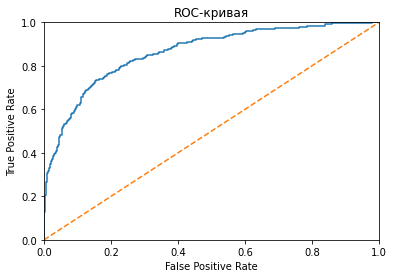

In [34]:
# Взвешивание классов

final_test_model = best_model_weighted

final_test_predict = final_test_model.predict(features_test)
f1_final_test = f1_score(target_test, final_test_predict)

final_test_prob = final_test_model.predict_proba(features_test)
final_test_prob_one = final_test_prob[:, 1]
roc_auc_final_test = roc_auc_score(target_test, final_test_prob_one)

print(f'F1-мера: {(f1_final_test):.3f}')
print(f'AUC-ROC: {(roc_auc_final_test):.3f}')
print()

# Построение графика ROC-кривой
fpr, tpr, thresholds = roc_curve(target_test, final_test_prob_one)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

### Вывод

На тестовой выборке достигнут результат контрольной метрики F1 равный 0,64 (округлено) для модели RandomForestClassifier с взвешиванием классов и подбором гиперпараметров, что превосходит пороговое значение (0,59) по условиям задания.

Метрика AUC-ROC на тестовой выборке имеет максимальное значение 0,86. Что подтверждает правильность в подходе выбора классификатора.

Cтоит отметить, что модель с применением уменьшения выборки (downsampling) имеет аналогичный показатель AUC-ROC на тестовой выборке, но меньший показатель F1.